#Image Processing Using NumPy
Image processing is a method to perform operations on images, in order to enhance them or extract useful information, analyze it and make decisions.

# Colored images usually have 3 channels — Red, Green, Blue.
red = image[:, :, 0]

green = image[:, :, 1]

blue = image[:, :, 2]


The PIL module stands for Python Imaging Library, which was a library in Python used for opening, manipulating, and saving images.



In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Load the image
image = Image.open('image1.jpeg')

# Convert the image to a NumPy array
image_array = np.array(image)
#print(image_array)

# Display the original image
plt.imshow(image_array)

# Print image shape
print(f"Image shape: {image_array.shape}")

FileNotFoundError: [Errno 2] No such file or directory: '/content/image1.jpeg'

# New Section

In [ ]:
image_max = image_array.max()
image_min = image_array.min()
image_mean = image_array.mean()

# Print the results
print(f"Max pixel value: {image_max}")
print(f"Min pixel value: {image_min}")
print(f"Mean pixel value: {image_mean}")

Max pixel value: 255
Min pixel value: 0
Mean pixel value: 116.0578924052903


In a NumPy array representing an image, the shape attribute tells you the dimensions of the image.
For example, if you have a grayscale image, the shape will be a tuple of two elements: (height, width).
If you have a color image (e.g., RGB), the shape will be a tuple of three elements: (height, width, channels), where channels represents the number of color channels (typically 3 for RGB images).

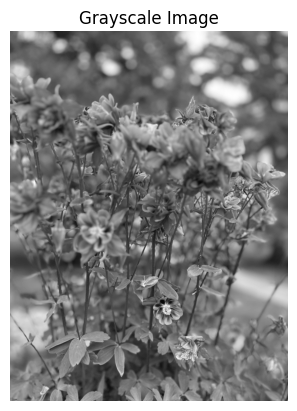

Image shape: (4032, 3024)


In [ ]:
# Convert to grayscale
gray_image = np.dot(image_array[...,:3], [0.2989, 0.5870, 0.1140])  # Weighted sum for RGB to Grayscale

# Display grayscale image
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')
plt.show()
print(f"Image shape: {gray_image.shape}")
#print(gray_image)


In [ ]:
# Flip the image horizontally
flipped_image = np.flipud(image_array)

# Display flipped image
plt.imshow(flipped_image)
plt.title("vertically Flipped Image")
plt.axis('off')
plt.show()


NameError: name 'np' is not defined

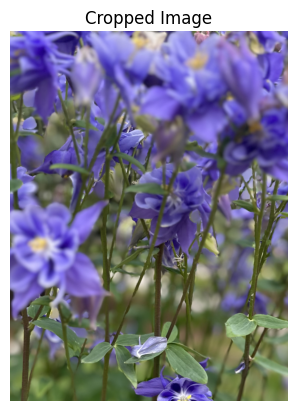

In [ ]:
# Crop the image (center region)
height, width, _ = image_array.shape
crop_image = image_array[height//4:3*height//4, width//4:3*width//4]

# Display cropped image
plt.imshow(crop_image)
plt.title("Cropped Image")
plt.axis('off')
plt.show()

# Data Augmentation

In [ ]:
import os

# Create a folder named "augmented_images"
folder_name = "augmented_images"
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [ ]:
from PIL import Image
import numpy as np

# Load the image
image = Image.open('image1.jpeg')

# Convert to NumPy array
image_array = np.array(image)

# Get image dimensions
height, width, _ = image_array.shape

# Define the coordinates for four parts
crops = [
    (0, 0, width // 2, height // 2),  # Top-left
    (width // 2, 0, width, height // 2),  # Top-right
    (0, height // 2, width // 2, height),  # Bottom-left
    (width // 2, height // 2, width, height),  # Bottom-right
]

# Crop and save each part
for i, (x1, y1, x2, y2) in enumerate(crops):
    cropped_image = image_array[y1:y2, x1:x2]
    cropped_image_pil = Image.fromarray(cropped_image)
    save_path = os.path.join(folder_name, f"flower_crop_{i + 1}.jpeg")
    cropped_image_pil.save(save_path)
    print(f"Saved: {save_path}")

Saved: augmented_images/flower_crop_1.jpeg
Saved: augmented_images/flower_crop_2.jpeg
Saved: augmented_images/flower_crop_3.jpeg
Saved: augmented_images/flower_crop_4.jpeg


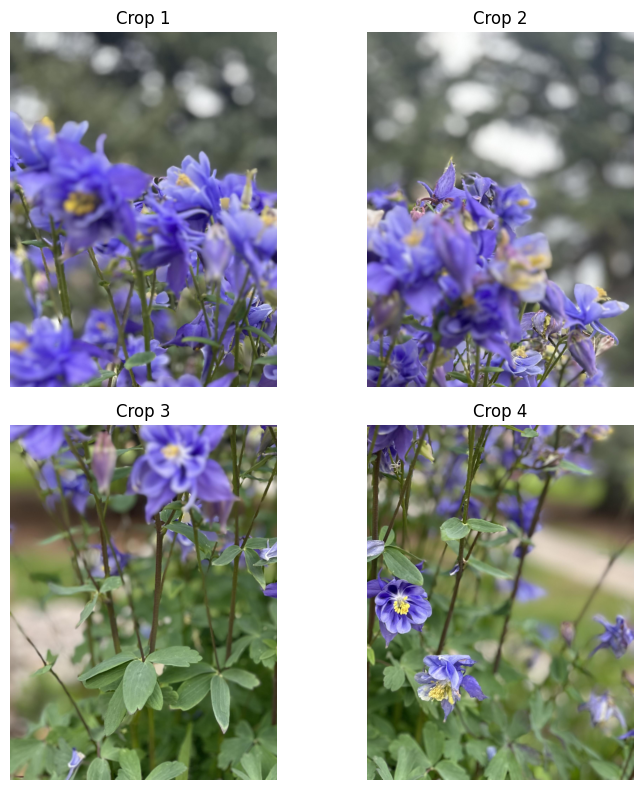

In [ ]:
import matplotlib.pyplot as plt

# Display cropped images
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
for i, ax in enumerate(axes.flatten()):
    cropped_image = Image.open(os.path.join(folder_name, f"flower_crop_{i + 1}.jpeg"))
    ax.imshow(cropped_image)
    ax.set_title(f"Crop {i + 1}")
    ax.axis('off')

plt.tight_layout()
plt.show()
